<a href="https://colab.research.google.com/github/Nilufaraliya/Descriptive-stats-in-R/blob/main/Clustering_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Crime data

1.	Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.
Data Description:
Murder -- Murder rates in different places of United States
Assault- Assault rate in different places of United States
Urban Pop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
crim=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/clusters/crime_data.csv")
crim.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
df.shape

(50, 4)

In [ ]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [ ]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.head()

,Assault,UrbanPop,Rape
0,0.654110,0.440678,0.359173
1,0.746575,0.271186,0.961240
2,0.852740,0.813559,0.612403
3,0.496575,0.305085,0.315245
4,0.791096,1.000000,0.860465


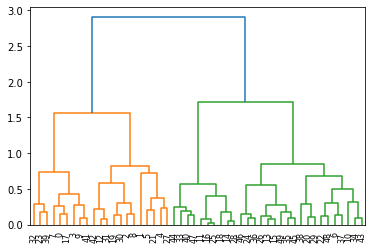

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

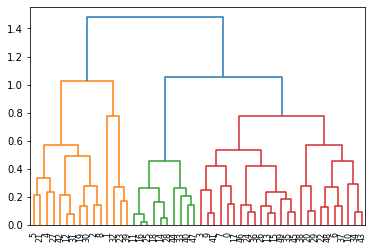

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

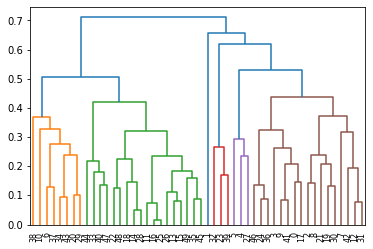

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

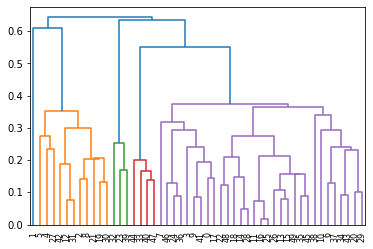

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

In [ ]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [ ]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,3
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
df['h_clusterid'] = Clusters
df

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [ ]:
Clusters.value_counts()

Clusters
0           47
1            1
2            1
3            1
dtype: int64

# Kmeans


In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
crim1=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/clusters/crime_data.csv")

In [ ]:
crim

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crim_df = scaler.fit_transform(crim.iloc[:,1:])

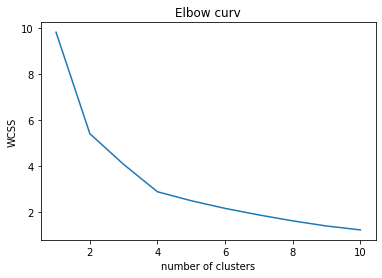

In [ ]:
# Elbow curv
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crim_df)

KMeans(n_clusters=4, random_state=42)

In [ ]:
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [ ]:
#Assign clusters to the data set
crim['clusterid_new'] = clusters_new.labels_

In [ ]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [ ]:
crim.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


In [ ]:
crim

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_crim_df)

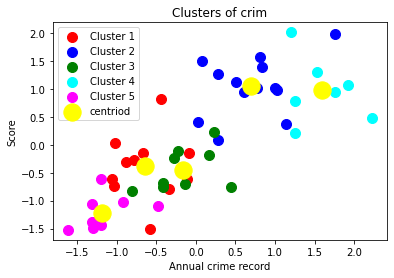

In [ ]:
plt.scatter(scaled_crim_df[y_kmeans == 0, 0], scaled_crim_df[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_crim_df[y_kmeans == 1, 0], scaled_crim_df[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(scaled_crim_df[y_kmeans == 2, 0], scaled_crim_df[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(scaled_crim_df[y_kmeans == 3, 0], scaled_crim_df[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(scaled_crim_df[y_kmeans == 4, 0], scaled_crim_df[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'centriod')
plt.title('Clusters of crim')
plt.xlabel('Annual crime record')
plt.ylabel('Score')
plt.legend()
plt.show()


# DBSCAN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
crim3=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/clusters/crime_data.csv")
df

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [ ]:
df.isna().sum()

Murder         0
Assault        0
UrbanPop       0
Rape           0
h_clusterid    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Murder       50 non-null     float64
 1   Assault      50 non-null     int64  
 2   UrbanPop     50 non-null     int64  
 3   Rape         50 non-null     float64
 4   h_clusterid  50 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.1 KB


In [ ]:
df.describe()

,Murder,Assault,UrbanPop,Rape,h_clusterid
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,0.120000
std,4.35551,83.337661,14.474763,9.366385,0.520596
min,0.80000,45.000000,32.000000,7.300000,0.000000
25%,4.07500,109.000000,54.500000,15.075000,0.000000
50%,7.25000,159.000000,66.000000,20.100000,0.000000
75%,11.25000,249.000000,77.750000,26.175000,0.000000
max,17.40000,337.000000,91.000000,46.000000,3.000000


In [ ]:
crim=df.drop(columns=['h_clusterid'])
crim

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [ ]:
array=crim.values

In [ ]:
#normalize data
from sklearn.preprocessing import StandardScaler
stsclr=StandardScaler().fit(crim)
norm_data=stsclr.transform(crim)

In [ ]:
#DBSCAN clustering
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=1.2,min_samples=6).fit(norm_data)


In [ ]:
#Noisy samples are given the label -1.
model.labels_

array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
clusters=pd.DataFrame(model.labels_,columns=['clusters'])

In [ ]:
clusters.value_counts()

clusters
 0          32
-1          18
dtype: int64

In [ ]:
#-1 cluster represents outliers which means we have 18 datapts as outliers
final_data=pd.concat([clusters,crim],axis=1)
final_data

,clusters,Murder,Assault,UrbanPop,Rape
0,-1,13.2,236,58,21.2
1,-1,10.0,263,48,44.5
2,-1,8.1,294,80,31.0
3,0,8.8,190,50,19.5
4,-1,9.0,276,91,40.6
5,-1,7.9,204,78,38.7
6,0,3.3,110,77,11.1
7,0,5.9,238,72,15.8
8,-1,15.4,335,80,31.9
9,-1,17.4,211,60,25.8


In [ ]:
final_data.groupby(final_data.clusters).sum()

,Murder,Assault,UrbanPop,Rape
clusters,,,,
-1,221.6,4726,1218,529.6
0,167.8,3812,2059,532.0


# Clustering Eastwest Airlines

2.	Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to    obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.
Data Description:
 The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers
ID --Unique ID
Balance--Number of miles eligible for award travel
Qual_mile--Number of miles counted as qualifying for Topflight status
cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:
1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
5	= 25,001 - 50,000
5	= over 50,000
Bonus miles--Number of miles earned from non-flight bonus transactions in the past 12 months
Bonus_trans--Number of non-flight bonus transactions in the past 12 months
Flight_miles_12mo--Number of flight miles in the past 12 months
Flight_trans_12--Number of flight transactions in the past 12 months
Days_since_enrolled--Number of days since enrolled in flier program
Award--whether that person had award flight (free flight) or not


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
## Loading Data
data=pd.read_excel('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/clusters/EastWestAirlines.xlsx',sheet_name='data')

In [ ]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# EDA and Data Processing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
# Renaming columns
data = data.rename({'ID#':'ID','Award?':'Award'}, axis = 1)
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
# Checking for all the values in dataset of type integer, if not replacing them with nan
def check_int(df):
    count = 0
    for row in df:
        try:
            if type(row) != int:
                df.loc[count] = np.nan
        except:
            pass
        count +=1

In [ ]:
check_int(data[data.columns])

In [ ]:
data.isna().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


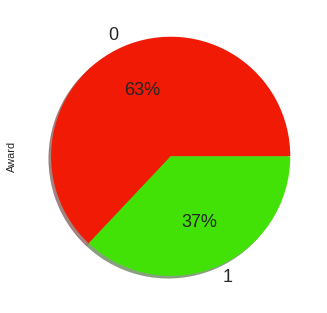

In [ ]:
# Checking previously awarded miles ratio
data['Award'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

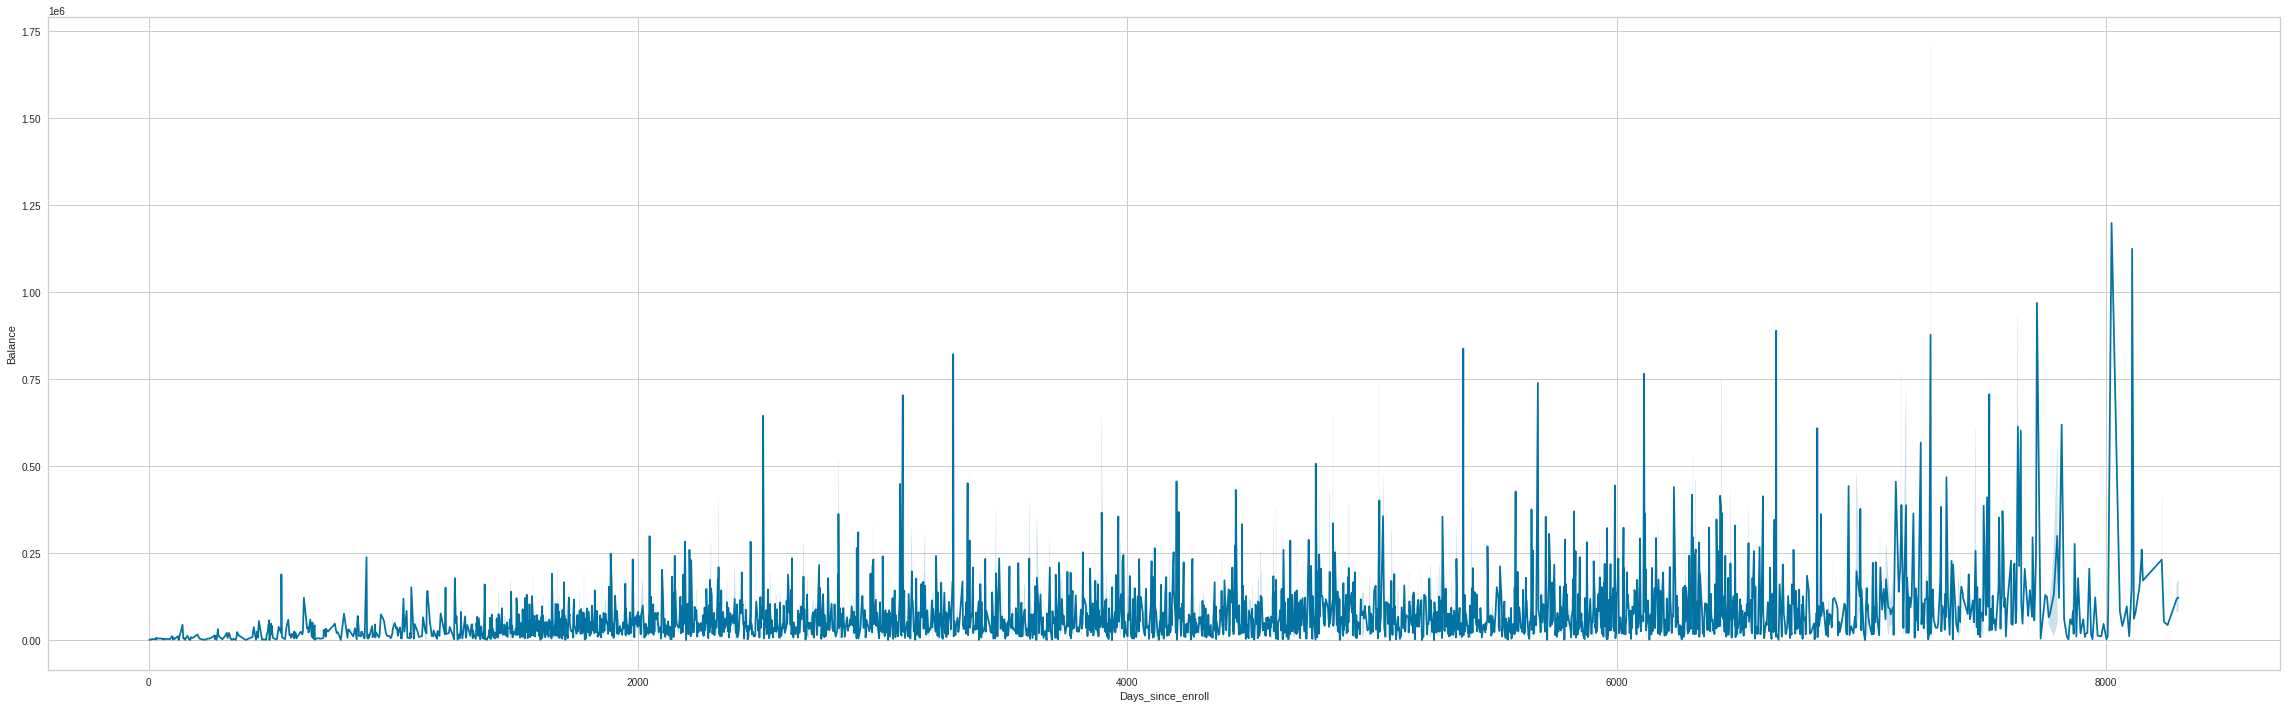

In [ ]:
# Checking relation between Balance and Days_since_enroll
import seaborn as sns
fig, ax =plt.subplots(figsize=(40,12))
ax = sns.lineplot(x= 'Days_since_enroll', y='Balance',data = data)

# Agglomerative Clustering

In [ ]:
data1 = data.drop('ID', axis = 1)
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
# We will check clustering for two different scaling functions
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [ ]:
# Normalizing Dataset
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(data1)
print(scaler2_df)

[[0.01650773 0.         0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.         0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.         0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.01886792 0.16867615 0.        ]
 [0.00176908 0.         0.         ... 0.         0.16831444 0.        ]]


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.862

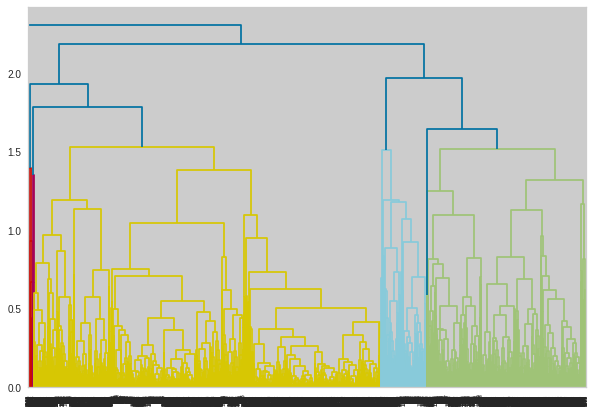

In [ ]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler1_df,'complete'))

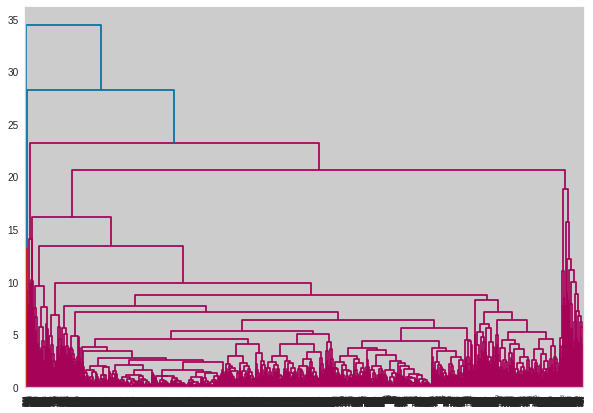

In [ ]:
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler2_df,'complete'))

In [ ]:
# Creating clusters
H_clusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=5)

In [ ]:
# Using data normalized by MinMaxScaler 
y=pd.DataFrame(H_clusters.fit_predict(scaler1_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clustersid, dtype: int64

In [ ]:
# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. minmaxscaler
data['clustersid_s1']=H_clusters.labels_
data

data1['clustersid_s1']=H_clusters.labels_

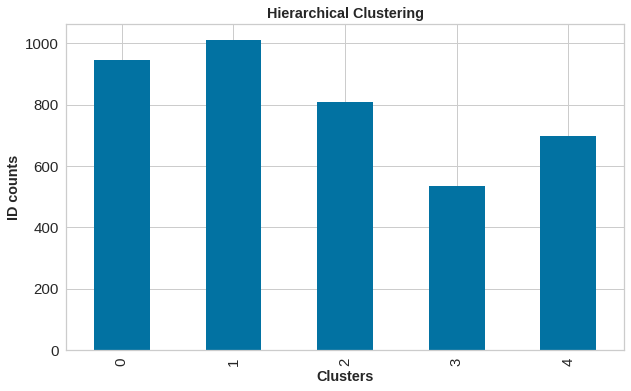

In [ ]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clustersid_s1']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [ ]:
data1.groupby('clustersid_s1').agg(['mean']).reset_index()

,clustersid_s1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


In [ ]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
sil_score= silhouette_score(scaler1_df, H_clusters.labels_)
sil_score

0.3762586351398372

In [ ]:
# Using data normalized by StandardScaler
y=pd.DataFrame(H_clusters.fit_predict(scaler2_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    2446
0    1362
2     130
3      43
4      18
Name: clustersid, dtype: int64

In [ ]:
# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. StandardScaler
data['clustersid_s2']=H_clusters.labels_
data1['clustersid_s2']=H_clusters.labels_

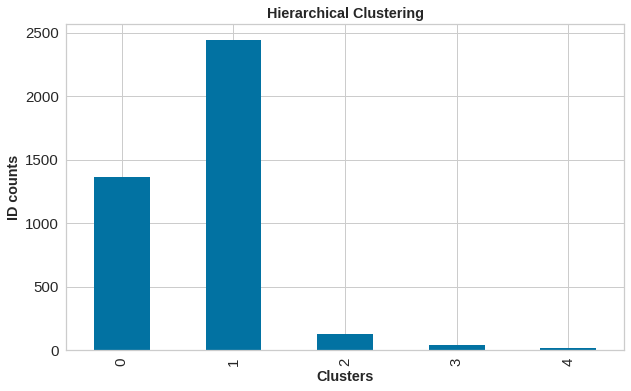

In [ ]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clustersid_s2']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [ ]:
data1.groupby('clustersid_s1').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s2
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clustersid_s1,,,,,,,,,,,,
0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0,0.627907
1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0,1.044510
2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0,0.507426
3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0,0.261682
4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0,1.011445


In [ ]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score

sil_score= silhouette_score(scaler2_df, H_clusters.labels_)
sil_score

0.3098805307874414

# K-Means clustering

In [ ]:
# Import Library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# Import Library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# Normalizing Dataset
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(data1)
print(scaler2_df)

[[0.01650773 0.         0.         ... 0.         0.25       0.25      ]
 [0.01128788 0.         0.         ... 0.         0.25       0.25      ]
 [0.02425685 0.         0.         ... 0.         0.25       0.25      ]
 ...
 [0.0431695  0.         0.5        ... 1.         0.         0.        ]
 [0.03220189 0.         0.         ... 0.         1.         0.25      ]
 [0.00176908 0.         0.         ... 0.         1.         0.25      ]]


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.39219215e-01  4.41786398e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.39219215e-01  4.41786398e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.39219215e-01  4.41786398e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ...  1.30391816e+00
  -1.25111675e+00 -1.17607423e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
   1.59647340e+00  4.41786398e-01]
 [-7.00507951e-01 -1.862

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

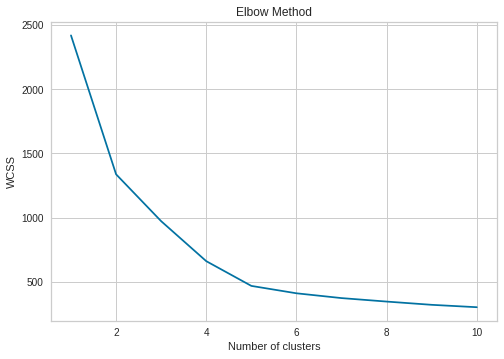

In [ ]:
# Using data normalized by MinMaxScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler1_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

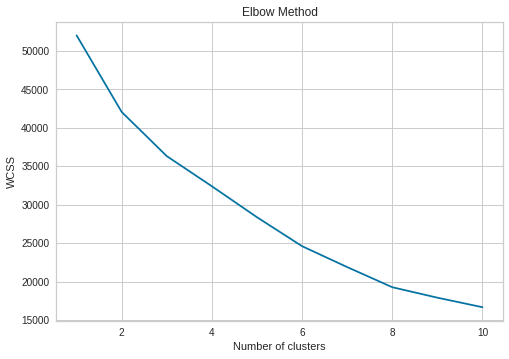

In [ ]:
# Using data normalized by StandardScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler2_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From above two Scree plots, optimum number of clusters can be selected equal to 5

In [ ]:
#Build Cluster algorithm


# Using data normalized by MinMaxScaler
clusters_new1 = KMeans(5, random_state=42)
clusters_new1.fit(scaler1_df)

sil_score= silhouette_score(scaler1_df, clusters_new1.labels_)
print('Silhouette Score for data normalized by MinMaxScaler: ',sil_score)

# Using data normalized by StandardScaler
clusters_new2 = KMeans(5, random_state=42)
clusters_new2.fit(scaler2_df)

sil_score= silhouette_score(scaler2_df, clusters_new2.labels_)
print('Silhouette Score for data normalized by StandardScaler: ',sil_score)

Silhouette Score for data normalized by MinMaxScaler:  0.5578853150250931
Silhouette Score for data normalized by StandardScaler:  0.3294874511326423


In [ ]:
#Assign clusters to the data set
data['clusterid_Kmeans'] = clusters_new1.labels_
data1['clusterid_Kmeans'] = clusters_new1.labels_

In [ ]:
y=pd.DataFrame(clusters_new1.fit_predict(scaler1_df),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

1    1194
0     948
3     699
4     625
2     533
Name: clusterid_Kmeans, dtype: int64

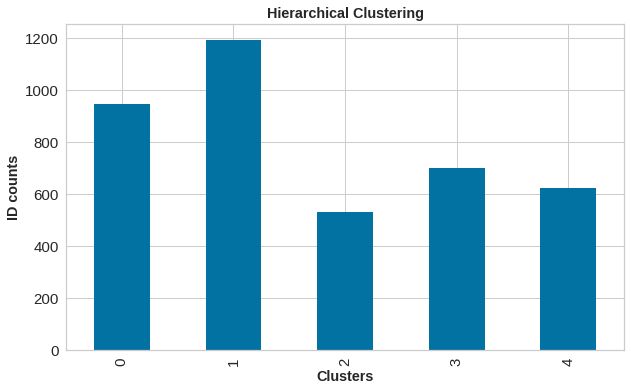

In [ ]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_Kmeans']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [ ]:
data1.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,80071.828059,276.433544,1.694093,1.024262,1.002110,12186.982068,12.262658,827.800633,2.483122,4367.631857,1.0,0.009494,0.635021
1,1,46926.743719,77.376884,1.144054,1.028476,1.006700,3747.433836,6.634003,159.219430,0.485762,4834.253769,0.0,1.153266,1.032663
2,2,127256.052533,175.744841,4.382739,1.000000,1.046904,58641.013133,22.043152,910.326454,2.806754,5082.930582,1.0,2.994371,0.247655
3,3,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0,4.000000,1.011445
4,4,117737.968000,95.448000,3.566400,1.001600,1.022400,31191.422400,17.337600,226.950400,0.640000,4402.667200,0.0,2.000000,0.372800


# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# Normalizing data using MinMaxScaler
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

[[0.01650773 0.         0.         ... 0.25       0.25       0.25      ]
 [0.01128788 0.         0.         ... 0.25       0.25       0.25      ]
 [0.02425685 0.         0.         ... 0.25       0.25       0.25      ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.         0.        ]
 [0.03220189 0.         0.         ... 1.         0.25       0.75      ]
 [0.00176908 0.         0.         ... 1.         0.25       0.75      ]]


We will try for different values of eps and mn_samples

In [ ]:
# Using data normalized by MinMaxScaler
dbscan = DBSCAN(eps=1, min_samples=12)
dbscan.fit(scaler1_df)

DBSCAN(eps=1, min_samples=12)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y=pd.DataFrame(dbscan.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
y['clusterid_DBSCAN'].value_counts()

 0    2518
 1    1479
-1       2
Name: clusterid_DBSCAN, dtype: int64

In [ ]:
# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan.labels_)
sil_score

0.4351796533177913

KeyError: ignored

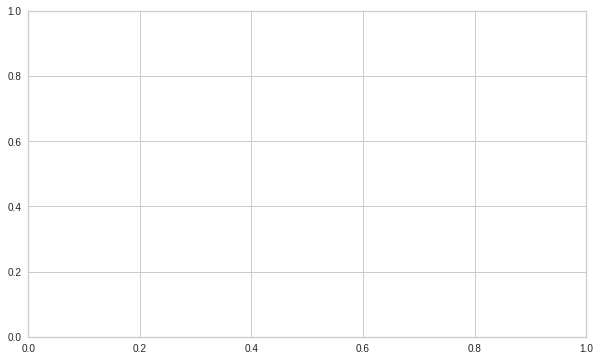

In [ ]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_DBSCAN']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [ ]:
data1.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

,clusterid_Kmeans,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,80071.828059,276.433544,1.694093,1.024262,1.002110,12186.982068,12.262658,827.800633,2.483122,4367.631857,1.0,0.009494,0.635021
1,1,46926.743719,77.376884,1.144054,1.028476,1.006700,3747.433836,6.634003,159.219430,0.485762,4834.253769,0.0,1.153266,1.032663
2,2,127256.052533,175.744841,4.382739,1.000000,1.046904,58641.013133,22.043152,910.326454,2.806754,5082.930582,1.0,2.994371,0.247655
3,3,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0,4.000000,1.011445
4,4,117737.968000,95.448000,3.566400,1.001600,1.022400,31191.422400,17.337600,226.950400,0.640000,4402.667200,0.0,2.000000,0.372800
